In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_random_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,SPAKPVQTITPHGK/4,0.275,0.124,[2],0,0.009,6,0.110,...,-1,0,0,(),Normal,Unk,Unk,1,Target,253317220
1,b1906_293T_proteinID_01A_QE3_122212.00013.00013.3,1,DLEDGEVPQHAGK/3,0.306,0.096,[2],0,0.329,43,0.076,...,-1,0,0,(),Normal,Unk,Unk,1,Target,40185656
2,b1906_293T_proteinID_01A_QE3_122212.00016.00016.3,1,NFC[160]SAVQYGNAQIIEC[160]LKENK/3,0.222,0.075,[2],0,-0.002,29,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,Target,197326059
3,b1906_293T_proteinID_01A_QE3_122212.00022.00022.2,1,HFTILDAPGHK/2,0.260,0.080,[2],0,0.006,113,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108157454
4,b1906_293T_proteinID_01A_QE3_122212.00026.00026.2,1,ELHSWEPEPDVR/2,0.255,0.076,[2],0,-0.006,71,0.055,...,-1,0,0,(),Normal,Unk,Unk,1,Target,62763094


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_random_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,AEPM[147]EEHEVK/3,0.175,0.0513,[2],0,0.335,8,0.0664,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,581943629
1,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,LVQVTGTK/2,0.173,0.0490,[2],0,0.005,26,0.0580,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,565596089
2,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,EQIEQAIEC[160]DQQELDKYK/2,0.113,0.0220,[2],0,0.501,11,0.0500,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,606169734
3,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.127,0.0130,[2],0,0.007,11,0.0550,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,489816443
4,b1906_293T_proteinID_01A_QE3_122212.00008.00008.2,1,HALEDEEEEPRGLSTAR/2,0.128,0.0330,[2],0,-0.008,14,0.0550,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,339387256


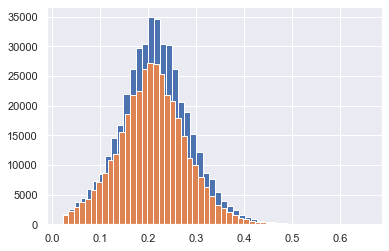

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.0127
0.011780000000000002


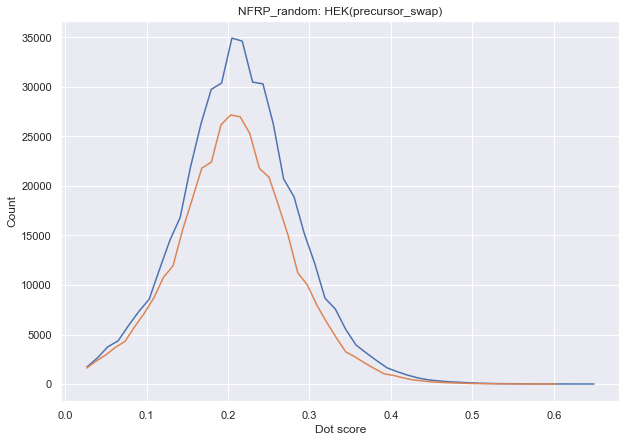

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_random: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.006, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0055, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

446195
372752


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과

"""

score:  0.001
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.002
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.003
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.004
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.005
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.006
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.007
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.008
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.009000000000000001
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.010000000000000002
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.011000000000000003
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.012000000000000004
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.013000000000000005
nnt:  446195
nnd:  372752
FDR:  0.8354015620972893


score:  0.014000000000000005
nnt:  446195
nnd:  372752

nnt:  416435
nnd:  344925
FDR:  0.828280523971328


score:  0.10400000000000008
nnt:  415696
nnd:  344310
FDR:  0.8282735460528848


score:  0.10500000000000008
nnt:  414984
nnd:  343638
FDR:  0.8280752992886473


score:  0.10600000000000008
nnt:  414223
nnd:  342941
FDR:  0.8279139497323905


score:  0.10700000000000008
nnt:  413453
nnd:  342214
FDR:  0.8276974650081146


score:  0.10800000000000008
nnt:  412710
nnd:  341521
FDR:  0.8275084199559012


score:  0.10900000000000008
nnt:  411923
nnd:  340796
FDR:  0.8273293795199588


score:  0.11000000000000008
nnt:  411137
nnd:  340030
FDR:  0.8270479183337914


score:  0.11100000000000008
nnt:  410290
nnd:  339288
FDR:  0.8269467937312632


score:  0.11200000000000009
nnt:  409426
nnd:  338574
FDR:  0.8269479710619257


score:  0.11300000000000009
nnt:  408602
nnd:  337804
FDR:  0.8267311466904225


score:  0.11400000000000009
nnt:  407718
nnd:  337028
FDR:  0.8266203601508886


score:  0.11500000000000009
nnt:  406820
nnd:  336226
FDR

nnt:  242048
nnd:  190922
FDR:  0.7887774325753569


score:  0.20600000000000016
nnt:  239293
nnd:  188605
FDR:  0.7881760018053182


score:  0.20700000000000016
nnt:  236628
nnd:  186287
FDR:  0.7872567912504015


score:  0.20800000000000016
nnt:  233917
nnd:  184012
FDR:  0.7866550956108364


score:  0.20900000000000016
nnt:  231169
nnd:  181715
FDR:  0.7860699315219601


score:  0.21000000000000016
nnt:  228495
nnd:  179427
FDR:  0.7852556948729732


score:  0.21100000000000016
nnt:  225772
nnd:  177133
FDR:  0.7845658451889517


score:  0.21200000000000016
nnt:  223105
nnd:  174890
FDR:  0.7838909930301876


score:  0.21300000000000016
nnt:  220464
nnd:  172667
FDR:  0.7831981638725597


score:  0.21400000000000016
nnt:  217761
nnd:  170456
FDR:  0.7827664274135405


score:  0.21500000000000016
nnt:  215046
nnd:  168250
FDR:  0.7823907443058694


score:  0.21600000000000016
nnt:  212333
nnd:  166009
FDR:  0.7818332524854827


score:  0.21700000000000016
nnt:  209561
nnd:  163739
FD

FDR:  0.6991615289765721


score:  0.3100000000000002
nnt:  39649
nnd:  27705
FDR:  0.6987565890690812


score:  0.3110000000000002
nnt:  38801
nnd:  27057
FDR:  0.6973273884693694


score:  0.3120000000000002
nnt:  37907
nnd:  26408
FDR:  0.6966523333421268


score:  0.3130000000000002
nnt:  37083
nnd:  25757
FDR:  0.6945770299058868


score:  0.3140000000000002
nnt:  36268
nnd:  25181
FDR:  0.6943035182530054


score:  0.3150000000000002
nnt:  35439
nnd:  24606
FDR:  0.6943198171505968


score:  0.3160000000000002
nnt:  34679
nnd:  24024
FDR:  0.6927535396061016


score:  0.3170000000000002
nnt:  33965
nnd:  23423
FDR:  0.6896216693655234


score:  0.3180000000000002
nnt:  33207
nnd:  22900
FDR:  0.6896136356792243


score:  0.31900000000000023
nnt:  32454
nnd:  22310
FDR:  0.6874345227090651


score:  0.32000000000000023
nnt:  31750
nnd:  21781
FDR:  0.686015748031496


score:  0.32100000000000023
nnt:  30999
nnd:  21244
FDR:  0.6853124294332075


score:  0.32200000000000023
nnt:  3

nnt:  2868
nnd:  1717
FDR:  0.5986750348675035


score:  0.4170000000000003
nnt:  2796
nnd:  1662
FDR:  0.5944206008583691


score:  0.4180000000000003
nnt:  2718
nnd:  1618
FDR:  0.5952906548933039


score:  0.4190000000000003
nnt:  2642
nnd:  1574
FDR:  0.5957607872823618


score:  0.4200000000000003
nnt:  2562
nnd:  1532
FDR:  0.5979703356752537


score:  0.4210000000000003
nnt:  2504
nnd:  1495
FDR:  0.5970447284345048


score:  0.4220000000000003
nnt:  2456
nnd:  1453
FDR:  0.5916123778501629


score:  0.4230000000000003
nnt:  2395
nnd:  1403
FDR:  0.58580375782881


score:  0.4240000000000003
nnt:  2331
nnd:  1366
FDR:  0.586014586014586


score:  0.4250000000000003
nnt:  2266
nnd:  1328
FDR:  0.5860547219770521


score:  0.4260000000000003
nnt:  2201
nnd:  1292
FDR:  0.587005906406179


score:  0.4270000000000003
nnt:  2143
nnd:  1248
FDR:  0.5823611759216052


score:  0.4280000000000003
nnt:  2089
nnd:  1217
FDR:  0.5825753949258018


score:  0.4290000000000003
nnt:  2045
nnd: 

nnt:  47
nnd:  11
FDR:  0.23404255319148937


score:  0.5680000000000004
nnt:  46
nnd:  9
FDR:  0.1956521739130435


score:  0.5690000000000004
nnt:  46
nnd:  9
FDR:  0.1956521739130435


score:  0.5700000000000004
nnt:  42
nnd:  8
FDR:  0.19047619047619047


score:  0.5710000000000004
nnt:  39
nnd:  8
FDR:  0.20512820512820512


score:  0.5720000000000004
nnt:  39
nnd:  8
FDR:  0.20512820512820512


score:  0.5730000000000004
nnt:  39
nnd:  8
FDR:  0.20512820512820512


score:  0.5740000000000004
nnt:  39
nnd:  8
FDR:  0.20512820512820512


score:  0.5750000000000004
nnt:  37
nnd:  8
FDR:  0.21621621621621623


score:  0.5760000000000004
nnt:  37
nnd:  7
FDR:  0.1891891891891892


score:  0.5770000000000004
nnt:  37
nnd:  7
FDR:  0.1891891891891892


score:  0.5780000000000004
nnt:  36
nnd:  7
FDR:  0.19444444444444445


score:  0.5790000000000004
nnt:  35
nnd:  7
FDR:  0.2


score:  0.5800000000000004
nnt:  35
nnd:  6
FDR:  0.17142857142857143


score:  0.5810000000000004
nnt:  35
nn

'\n결과\nscore:  0.4980000000000004\nnnt:  277943\nnnd:  2773\nFDR:  0.009976865760245805\n'